In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('homeprices_banglore.csv')
df

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00
5,1170,2,38.00
6,2732,4,135.00
7,3300,4,155.00
8,1310,3,50.00
9,3700,5,167.00


In [3]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_x = sx.fit_transform(df.drop('price', axis=1)) #brings the values to the scale of zero to one
scaled_x

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [4]:
scaled_y = sy.fit_transform(df[['price']])
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

Implementing Batch Gradient Descent

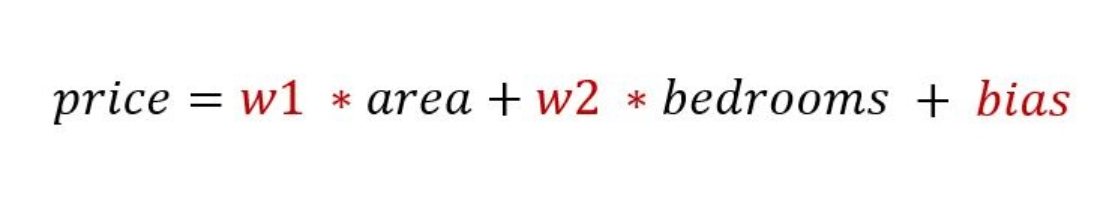

In [7]:
import numpy as np
#Defining Gradient Descent Function
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
    number_of_features = X.shape[1] #the entire rows of X
    w = np.ones(shape=(number_of_features))# initializing weight to be ones
    b = 0 # initializing bias to be 0
    total_samples = X.shape[0]

    #simple list to record cost and epoch
    cost_list = []
    epoch_list = []

    for i in range(epochs):
        y_predicted = np.dot(w, X.T) + b #X.t will return the transpose

        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted) #differences in weight(derivative)

        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        #my loss/cost is the mean squared error
        cost = np.mean((y_true - y_predicted) ** 2)
        
        if i%10==0:
            #down here we append cost to cost list and epoch to epoch list
            cost_list.append(cost)
            epoch_list.append(i)
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_x, scaled_y.reshape(scaled_y.shape[0]), 500)
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

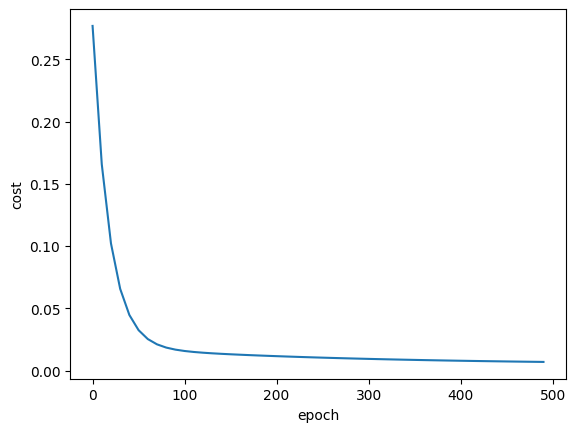

In [8]:
from matplotlib import pyplot as plt
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list, cost_list)

Calling Prediction Function

In [9]:
def predict(area, bedrooms, w, b):
    # scaling x
    scaled_x = sx.transform([[area, bedrooms]])[0]

    scaled_price = w[0]*scaled_x[0] + w[1] * scaled_x[1] + b
    return sy.inverse_transform([[scaled_price]])

predict(2600, 4, w, b)

c:\Users\Randy\Desktop\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[128.45484403]])

Stochastic Gradient Descent

Stochastic GD will use randomly picked single training sample to calculate error and using this error we backpropage to adjust weights

In [22]:
import random

def stochastic_gradient_descent(X, y_true, epoch, learning_rate = 0.01):
    number_of_features = X.shape[1]

    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]

    cost_list = []
    epoch_list = []

    for i in range(epoch):
        random_index = random.randint(0,total_samples-1)
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        y_predicted = np.dot(w, sample_x.T) + b

        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)

        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        cost = np.square(sample_y - y_predicted)

        if(i%100 == 0): #at every 100th iteration...record the cost and the epoch value
            cost_list.append(cost)
            epoch_list.append(i)

    return w, b, cost ,cost_list, epoch_list


w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_x, scaled_y.reshape(scaled_y.shape[0]), 10000)
w_sgd, b_sgd, cost_sgd

(array([0.712162  , 0.67599055]), -0.23282822000535866, 0.001613129025246801)

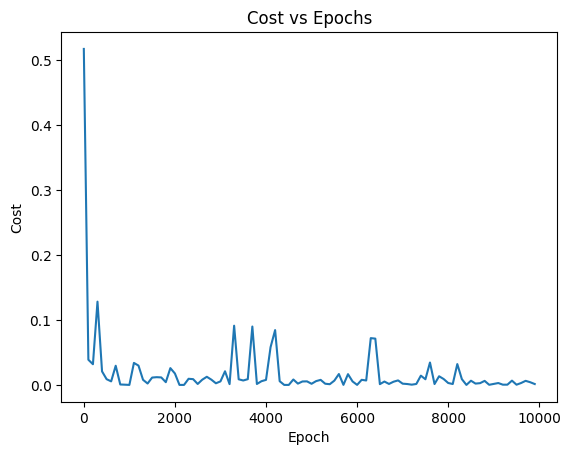

In [23]:
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Cost vs Epochs')
plt.plot(epoch_list_sgd, cost_list_sgd)

In [24]:
predict(2600, 4, w_sgd, b_sgd)

c:\Users\Randy\Desktop\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[128.68649704]])